In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath

from dask.distributed import Client 
from dask.distributed import LocalCluster 

cluster = LocalCluster()
client = Client(cluster) 
client

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34492 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34492/status,
Dashboard: http://127.0.0.1:34492/status,Workers: 4
Total threads: 8,Total memory: 30.94 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33178,Workers: 4
Dashboard: http://127.0.0.1:34492/status,Total threads: 8
Started: Just now,Total memory: 30.94 GiB
Comm: tcp://127.0.0.1:41356,Total threads: 2
Dashboard: http://127.0.0.1:39247/status,Memory: 7.73 GiB
Nanny: tcp://127.0.0.1:37826,


### Load salinity output for control and last 20 years of the perturbation experiments

In [6]:
S_cntrl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.0101-0270.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),time=slice('0121-07-02','0220-07-02'),yh=slice(-90,-30)).chunk({'yh':126,'time':20})

S_stress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_101/ocean_annual_z.0151-0170.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_stress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_151/ocean_annual_z.0051-0070.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_stress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_201/ocean_annual_z.0051-0070.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

S_antwater_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_101/ocean_annual_z.0151-0170.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwater_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_151/ocean_annual_z.0051-0070.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwater_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_201/ocean_annual_z.0051-0070.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

S_antwaterstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_101/ocean_annual_z.0151-0170.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwaterstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_151/ocean_annual_z.0051-0070.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwaterstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_201/ocean_annual_z.0051-0070.so.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})


### Load potential temperature output for control and last 20 years of the perturbation experiments

In [8]:
T_cntrl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.0101-0270.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),time=slice('0121-07-02','0220-07-02'),yh=slice(-90,-30)).chunk({'yh':126,'time':20})

T_stress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_101/ocean_annual_z.0151-0170.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_stress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_151/ocean_annual_z.0051-0070.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_stress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_201/ocean_annual_z.0051-0070.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

T_antwater_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_101/ocean_annual_z.0151-0170.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwater_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_151/ocean_annual_z.0051-0070.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwater_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_201/ocean_annual_z.0051-0070.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

T_antwaterstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_101/ocean_annual_z.0151-0170.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwaterstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_151/ocean_annual_z.0051-0070.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwaterstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_201/ocean_annual_z.0051-0070.thetao.nc',
                    drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

### Load static file and one volcello file for volume-weighting. Note that volcello actually varies in time due to the free surface and Lagrangian vertical coordinate, but for looking at depth-averaged anomalies, assuming volcello is temporally constant is okay.

In [9]:
static_ocean = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.static.nc')
volume = xr.open_dataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.1116-1120.volcello.nc',use_cftime=True).isel(time=0)

### Create Ensembles and ensemble means. For ESM4, the first ensemble member (101) is on a different time axis. The last 20 years are years 151-170 instead of 51-70, so before creating ensemble means, compute the time average to get rid of this conflicting time dimension.

In [11]:
## Salinity
S_stress_ens = xr.concat([S_stress_101.mean(dim='time'),S_stress_151.mean(dim='time'),S_stress_201.mean(dim='time')],dim='member')
S_antwater_ens = xr.concat([S_antwater_101.mean(dim='time'),S_antwater_151.mean(dim='time'),S_antwater_201.mean(dim='time')],dim='member')
S_antwaterstress_ens = xr.concat([S_antwaterstress_101.mean(dim='time'),S_antwaterstress_151.mean(dim='time'),S_antwaterstress_201.mean(dim='time')],dim='member')

S_stress_ens_mean = S_stress_ens.so.mean(dim='member')
S_antwater_ens_mean = S_antwater_ens.so.mean(dim='member')
S_antwaterstress_ens_mean = S_antwaterstress_ens.so.mean(dim='member')

## Temperature
T_stress_ens = xr.concat([T_stress_101.mean(dim='time'),T_stress_151.mean(dim='time'),T_stress_201.mean(dim='time')],dim='member')
T_antwater_ens = xr.concat([T_antwater_101.mean(dim='time'),T_antwater_151.mean(dim='time'),T_antwater_201.mean(dim='time')],dim='member')
T_antwaterstress_ens = xr.concat([T_antwaterstress_101.mean(dim='time'),T_antwaterstress_151.mean(dim='time'),T_antwaterstress_201.mean(dim='time')],dim='member')

T_stress_ens_mean = T_stress_ens.thetao.mean(dim='member')
T_antwater_ens_mean = T_antwater_ens.thetao.mean(dim='member')
T_antwaterstress_ens_mean = T_antwaterstress_ens.thetao.mean(dim='member')

### Compute ensemble mean difference from piControl 100-year average

In [18]:
S_stress_ens_diff = S_stress_ens_mean - S_cntrl.so.mean(dim='time')
S_antwater_ens_diff = S_antwater_ens_mean - S_cntrl.so.mean(dim='time')
S_antwaterstress_ens_diff = S_antwaterstress_ens_mean - S_cntrl.so.mean(dim='time')

T_stress_ens_diff = T_stress_ens_mean - T_cntrl.thetao.mean(dim='time')
T_antwater_ens_diff = T_antwater_ens_mean - T_cntrl.thetao.mean(dim='time')
T_antwaterstress_ens_diff = T_antwaterstress_ens_mean - T_cntrl.thetao.mean(dim='time')

### Compute volume-weighted depth-average anomalies from 200 m to 1000 m

In [19]:
vol_weights = volume.volcello.sel(yh=slice(-90,-30),z_l=slice(200,1000))
S_stress_ens_diff_weighted = S_stress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
S_antwaterstress_ens_diff_weighted = S_antwaterstress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
S_antwater_ens_diff_weighted = S_antwater_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')

T_stress_ens_diff_weighted = T_stress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
T_antwaterstress_ens_diff_weighted = T_antwaterstress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
T_antwater_ens_diff_weighted = T_antwater_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')

### Function to set up Antarctic Polar Projections

In [24]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

depth = static_ocean['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

import matplotlib.ticker as mticker

def antarctic_map(ax, grid):
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -35], ccrs.PlateCarree())
    ax.contour(static_ocean.xh,static_ocean.yh,shelf_mask,colors='black',linewidths = 0.5,transform=ccrs.PlateCarree())
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
        gl.ylocator = mticker.FixedLocator([-90, -80, -70, -60, -50, -40])

### 200 to 1000 m depth-average (volume-weighted) temperature difference from piControl

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


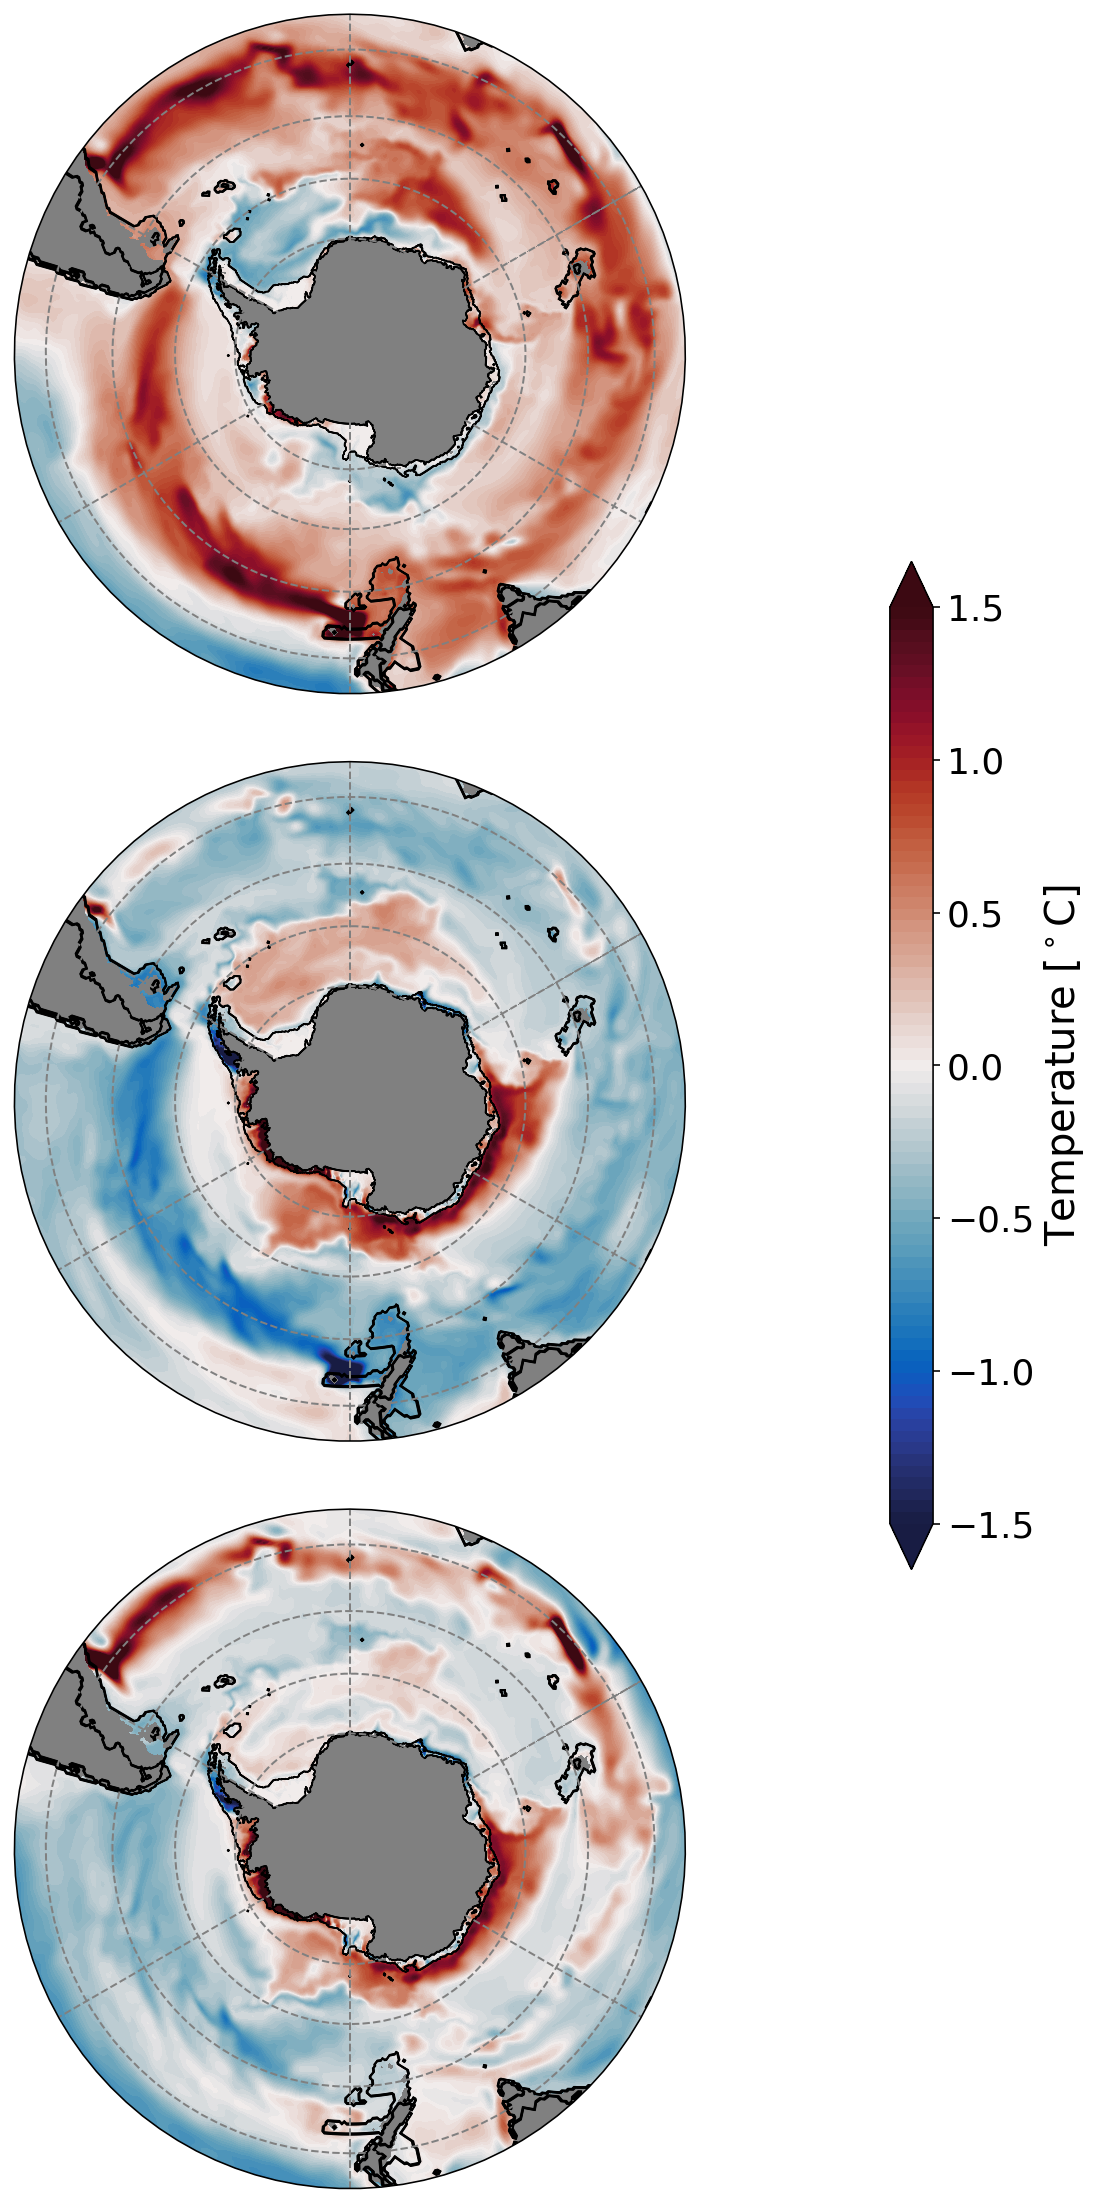

In [25]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_esm4 = static_ocean.xh.values
y_esm4 = static_ocean.yh.sel(yh=slice(-90,-30)).values
x_esm4,y_esm4 = np.meshgrid(x_esm4,y_esm4)

levels_temp_diff = np.linspace(-1.5,1.5,80)

ax0.contourf(x_esm4,y_esm4,T_stress_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax1.contourf(x_esm4,y_esm4,T_antwater_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax2.contourf(x_esm4,y_esm4,T_antwaterstress_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')


### Add Vertical Colorbar
cbr_temp_diff = ax0.contourf(x_esm4,y_esm4,T_stress_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_temp_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [-1.5,-1.0,-0.5,0,0.5,1.0,1.5])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Temperature [$^\circ$C]', fontsize=20)

plt.savefig('ESM4_200_to_1000m_depth_ave_Temp_Anomaly.pdf')

### 200 to 1000 m depth-average (volume-weighted) salinity difference from piControl

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi

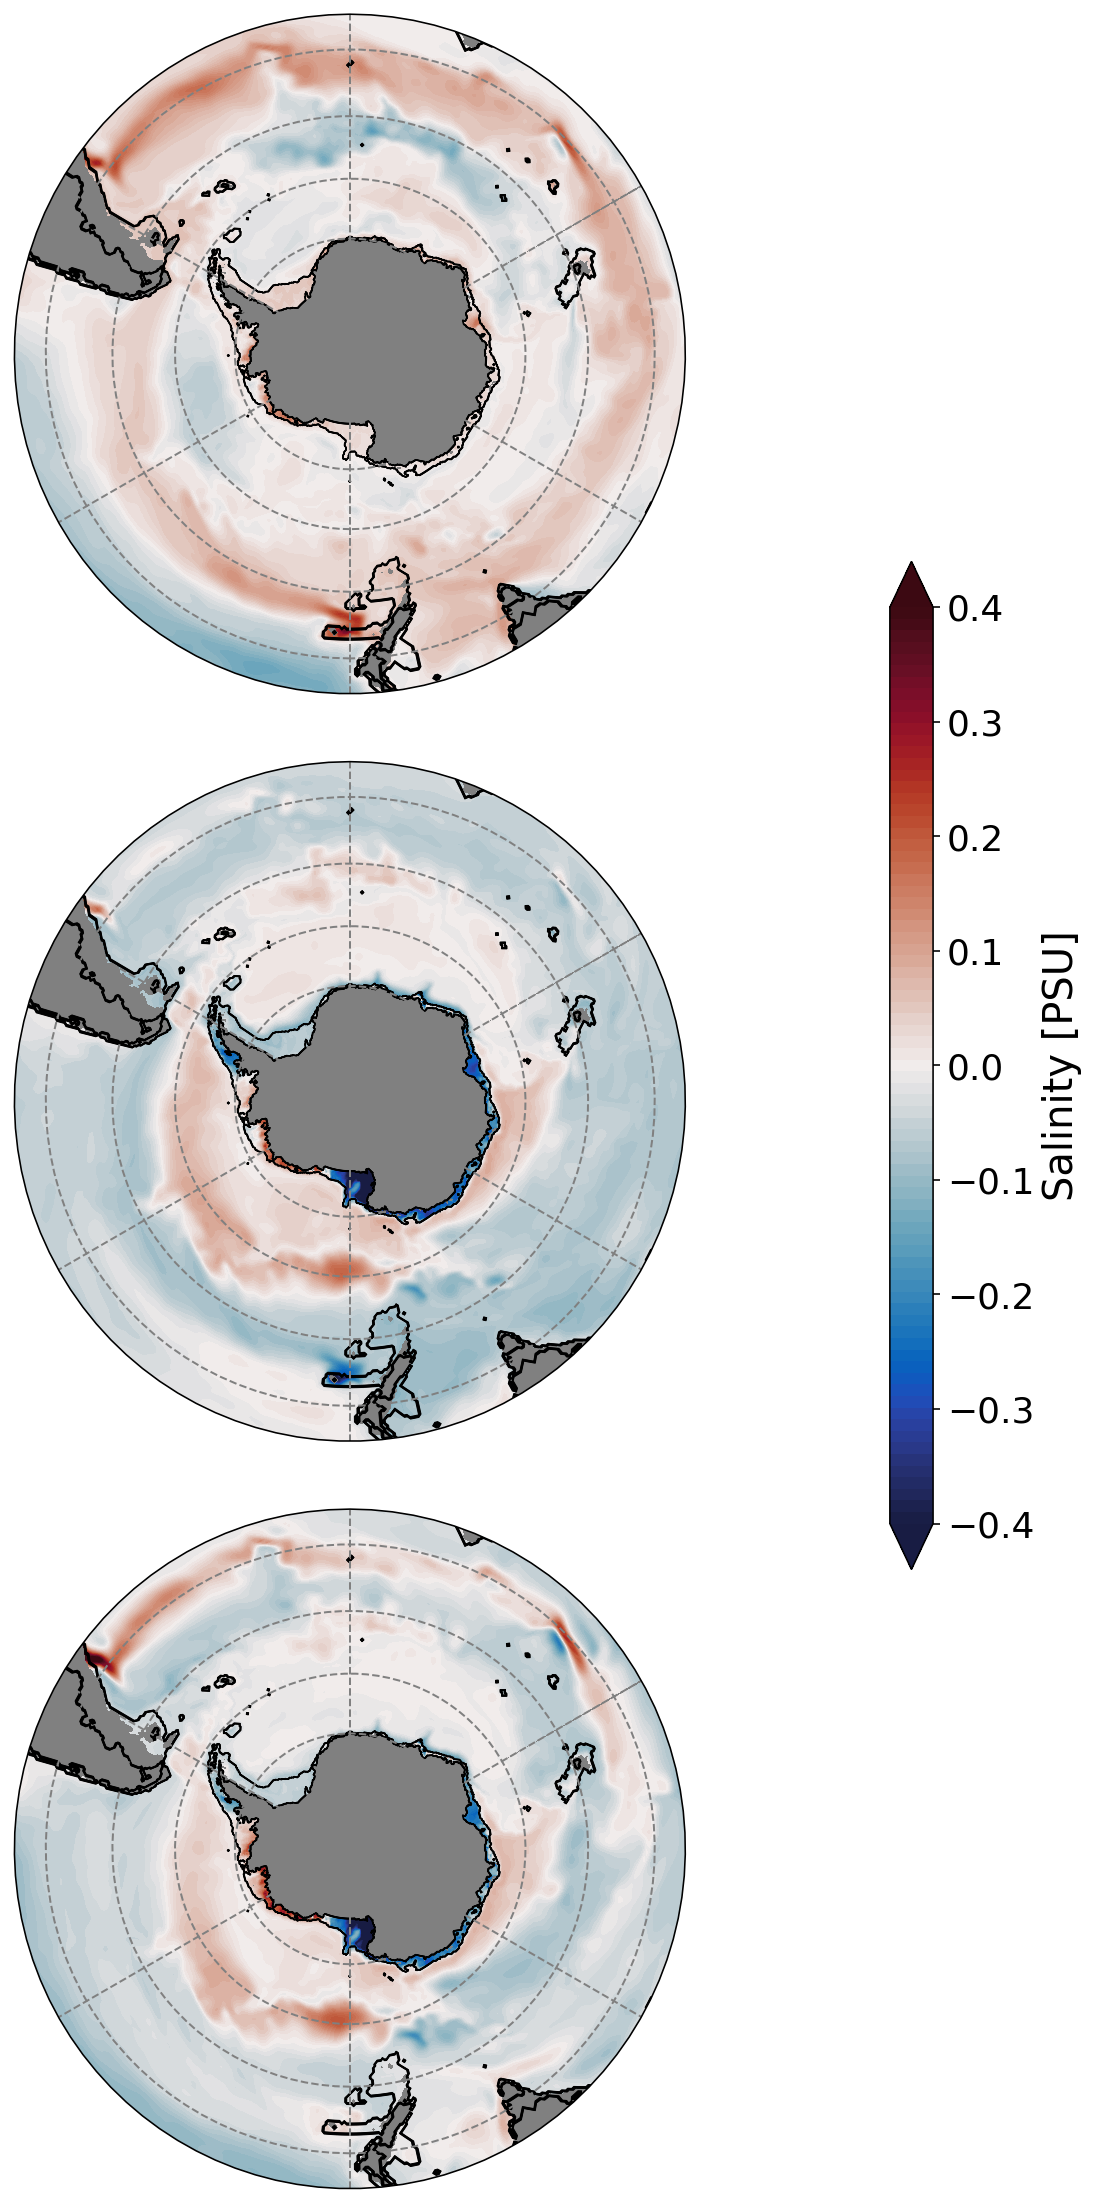

In [26]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_esm4 = static_ocean.xh.values
y_esm4 = static_ocean.yh.sel(yh=slice(-90,-30)).values
x_esm4,y_esm4 = np.meshgrid(x_esm4,y_esm4)

levels_so_diff = np.linspace(-0.40,0.40,80)

ax0.contourf(x_esm4,y_esm4,S_stress_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax1.contourf(x_esm4,y_esm4,S_antwater_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax2.contourf(x_esm4,y_esm4,S_antwaterstress_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')


### Add Vertical Colorbar on Right
cbr_so_diff = ax0.contourf(x_esm4,y_esm4,S_stress_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_so_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [-0.40,-0.30,-0.20,-0.10,0,0.10,0.20,0.30,0.40])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Salinity [PSU]', fontsize=20)

plt.savefig('ESM4_200_to_1000m_depth_ave_Salt_Anomaly.pdf')

## Depth-averaged piControl salinty and temperature 100 yr average.

In [28]:
S_cntrl_200_2000_weighted = S_cntrl.so.weighted(vol_weights.fillna(0)).mean(dim='z_l')
S_cntrl_200_2000_weighted_ave = S_cntrl_200_2000_weighted.mean(dim='time')

T_cntrl_200_2000_weighted = T_cntrl.thetao.weighted(vol_weights.fillna(0)).mean(dim='z_l')
T_cntrl_200_2000_weighted_ave = T_cntrl_200_2000_weighted.mean(dim='time')

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/nbhome

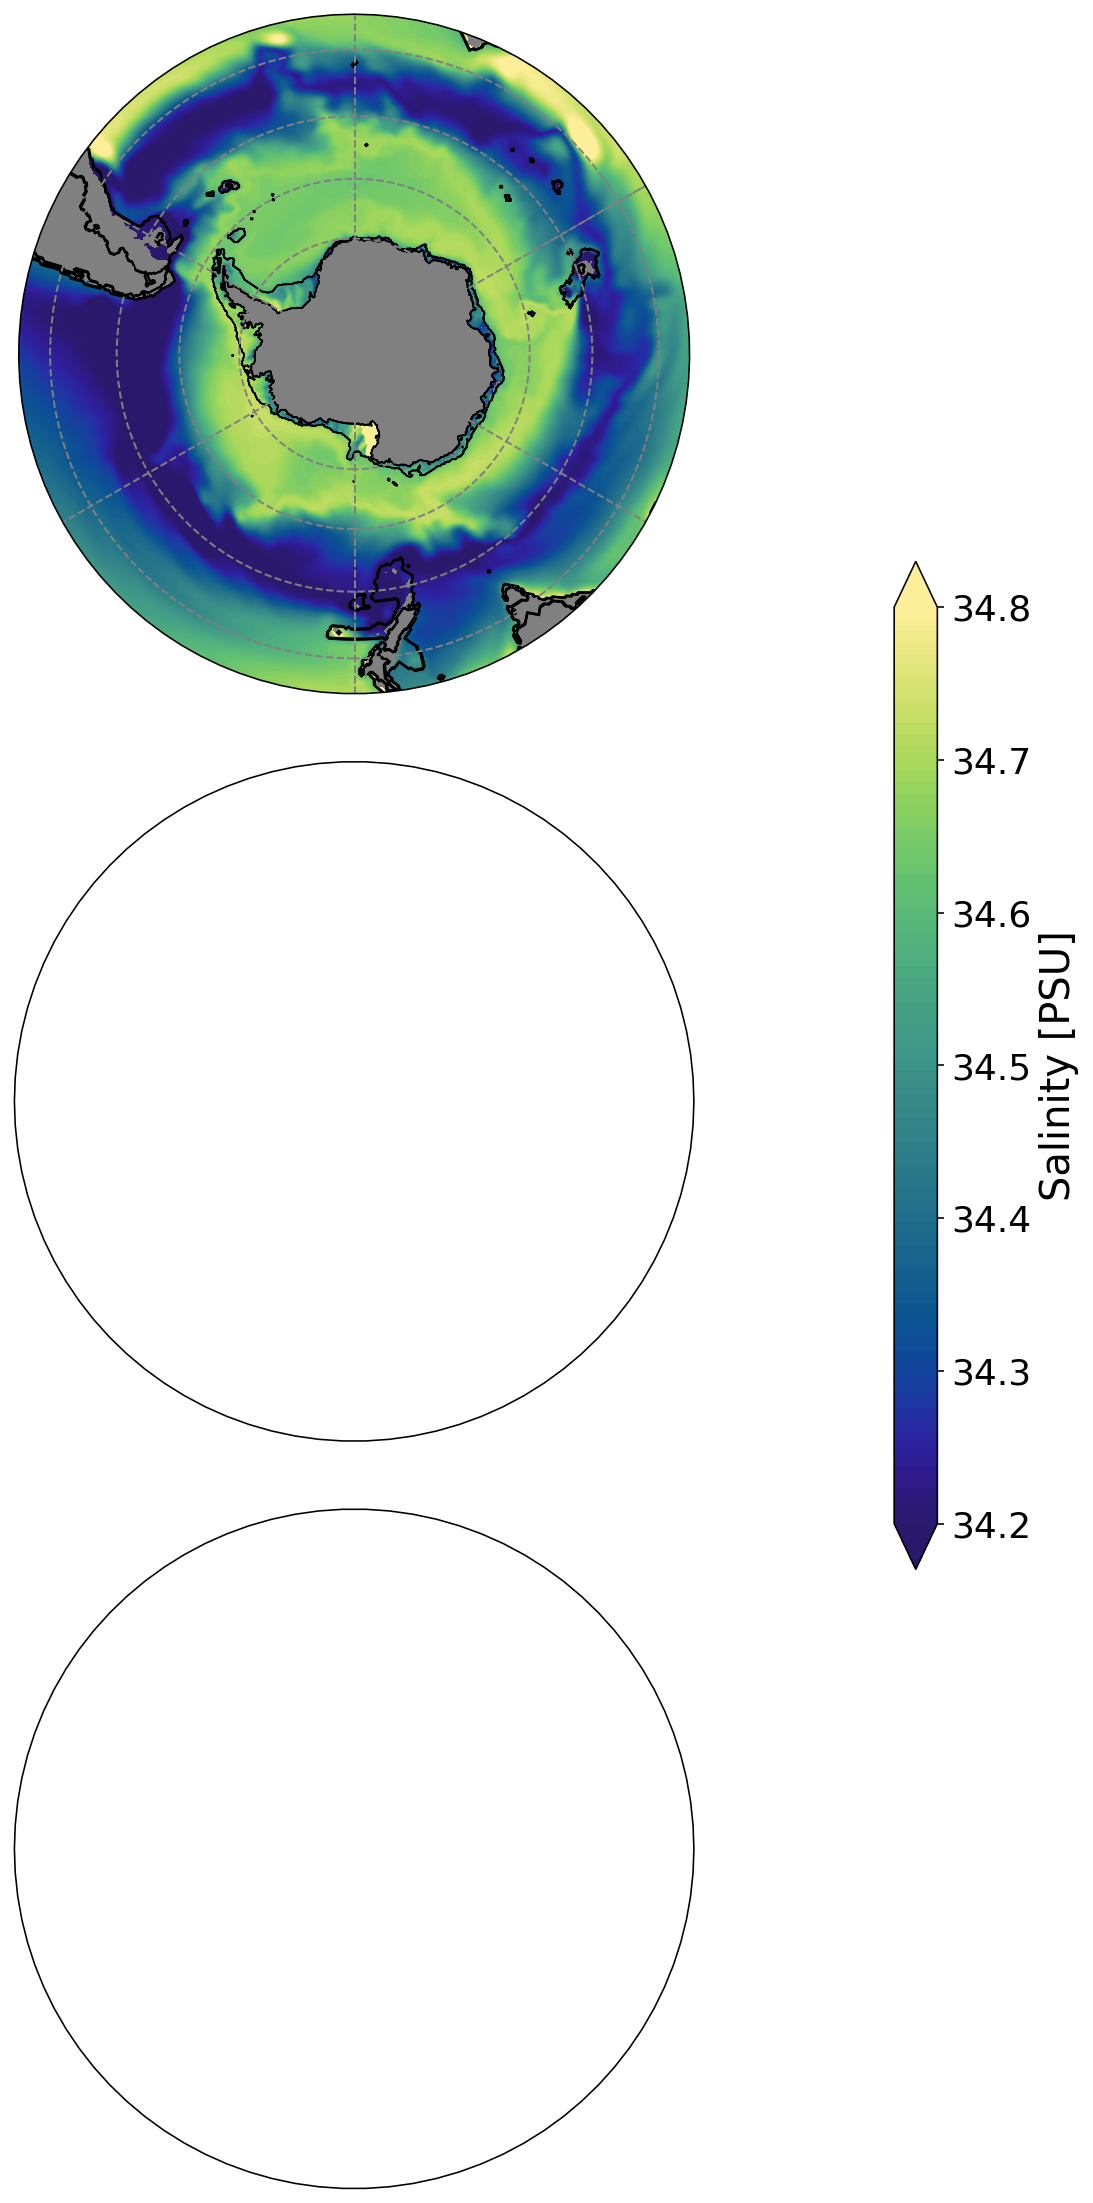

In [29]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo()),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo()),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)

x_esm4 = static_ocean.xh.values
y_esm4 = static_ocean.yh.sel(yh=slice(-90,-30)).values
x_esm4,y_esm4 = np.meshgrid(x_esm4,y_esm4)

levels_salt = np.linspace(34.2,34.8,80)

ax0.contourf(x_esm4,y_esm4,S_cntrl_200_2000_weighted_ave.values,
             levels=levels_salt,
             cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree(),extend='both')

### Add Vertical Colorbar on Right
cbr_S_diff = ax0.contourf(x_esm4,y_esm4,S_cntrl_200_2000_weighted_ave.values,
             levels=levels_salt,
             cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_S_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [34.2,34.3,34.4,34.5,34.6,34.7,34.8])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Salinity [PSU]', fontsize=20)

plt.savefig('ESM4_200_to_1000m_depth_ave_salinity_piControl_CORRECT.pdf')

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi

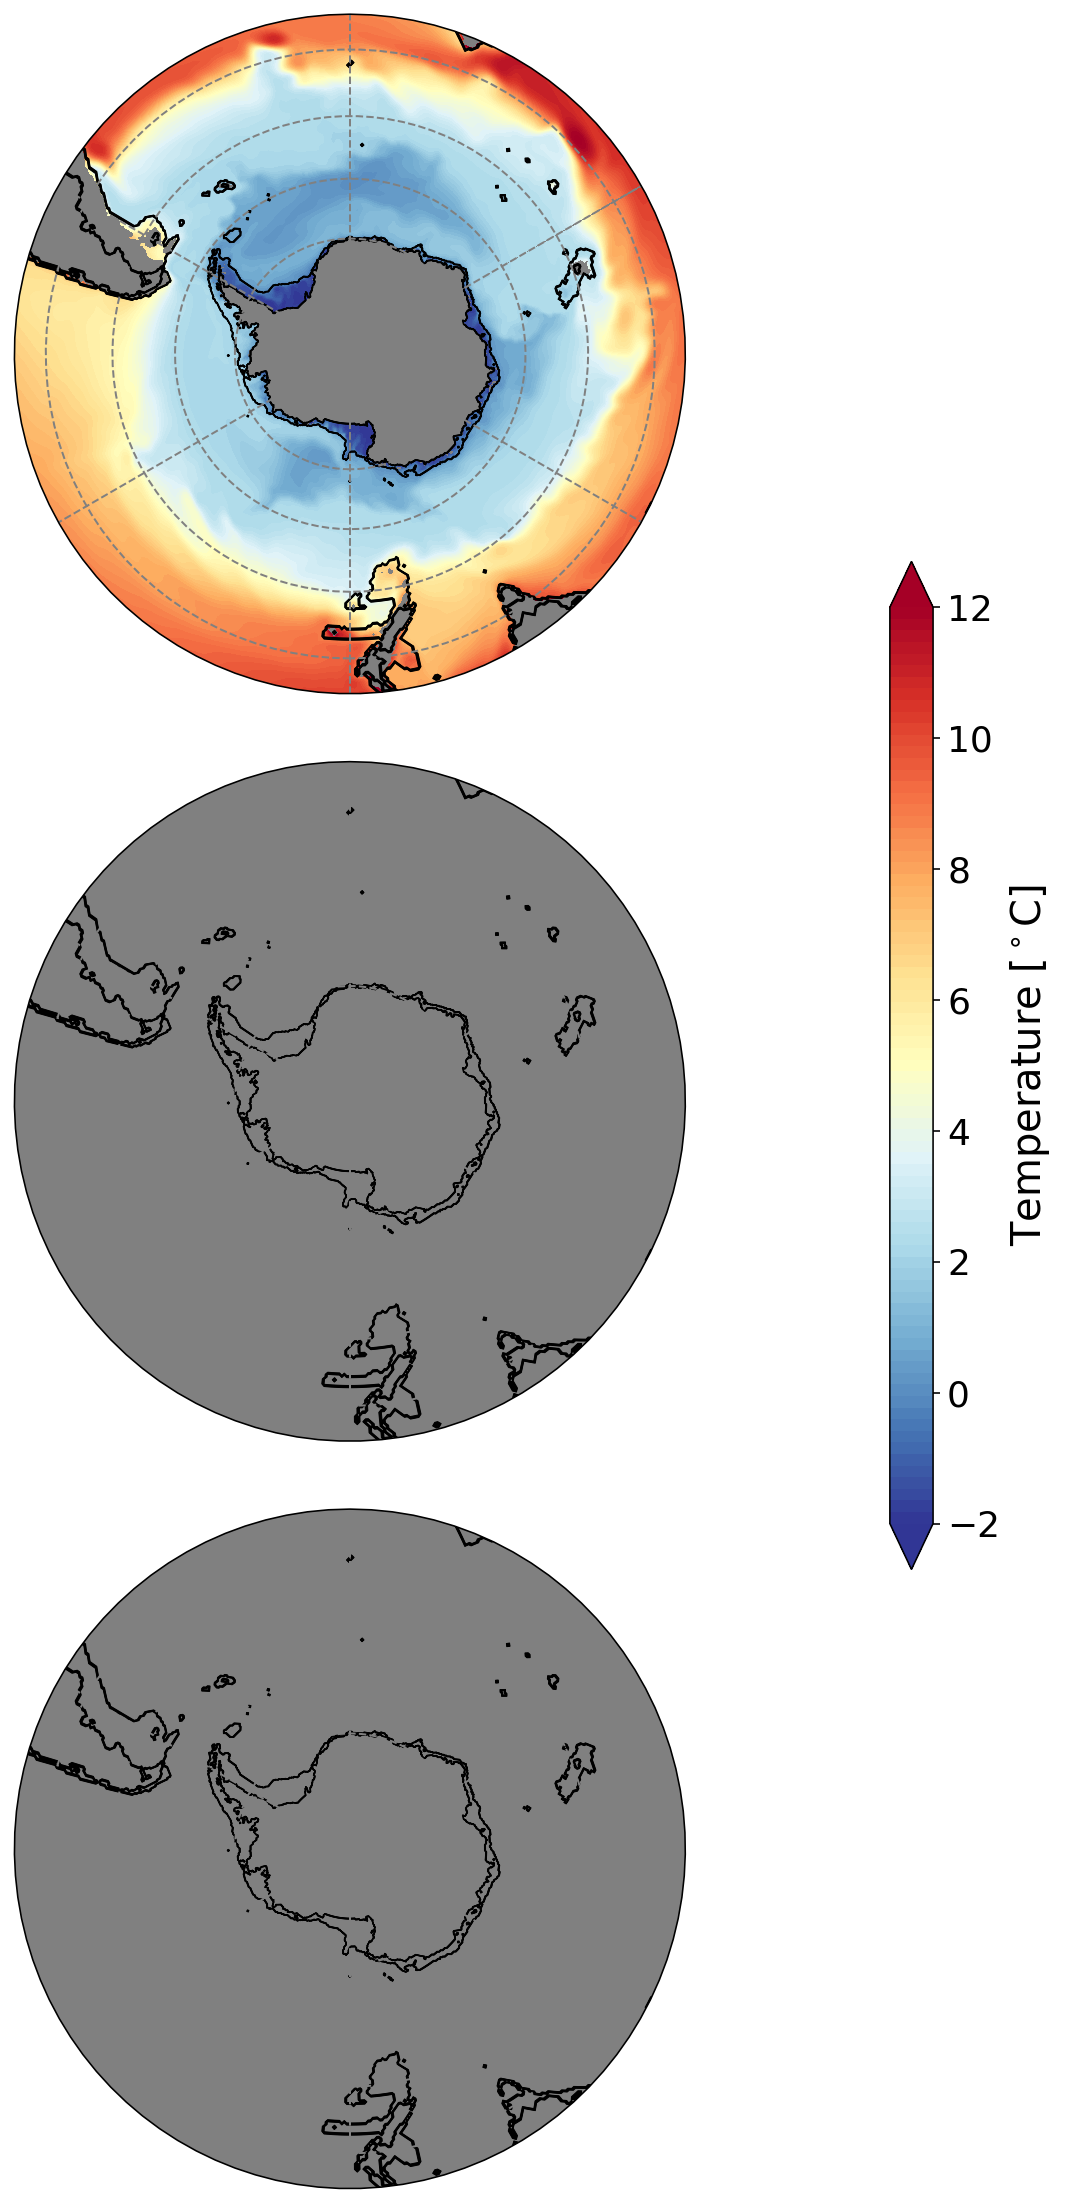

In [30]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_esm4 = static_ocean.xh.values
y_esm4 = static_ocean.yh.sel(yh=slice(-90,-30)).values
x_esm4,y_esm4 = np.meshgrid(x_esm4,y_esm4)

levels_temp = np.linspace(-2,12,80)

ax0.contourf(x_esm4,y_esm4,T_cntrl_200_2000_weighted_ave.values,
             levels=levels_temp,
             cmap='RdYlBu_r',
             transform=ccrs.PlateCarree(),extend='both')


### Add Vertical Colorbar on Right
cbr_temp = ax0.contourf(x_esm4,y_esm4,T_cntrl_200_2000_weighted_ave.values,
             levels=levels_temp,
             cmap='RdYlBu_r',
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_temp,cax=cax,orientation='vertical',shrink=0.5,ticks = [-2,0,2,4,6,8,10,12])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Temperature [$^\circ$C]', fontsize=20)

plt.savefig('ESM4_200_to_1000m_depth_ave_temp_piControl_CORRECT.pdf')